In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import graycode

In [2]:
Q = 20     # количество поколений
MAX_ENT = 10 # размер популяции
MAX_CH = 3  # количество детей в одном цинкле вспроизводства
N = 9      # длина хромосомы

In [3]:
#Функция варианта 6
def f(x):
    return((0.8 * np.cos(3 * x) + np.cos(x)) * (x - 4))

In [4]:
h = 35 / 511
x = np.arange(0, 35 + h, h)
y = f(x[:])

In [5]:
#Функция фитнеса в кодах грея
def fitness(inp):
    inp = int(inp,2)
    i=graycode.gray_code_to_tc(inp)
    return y[i]

In [6]:
fit_q = [[0 for _ in range(MAX_ENT)] for _ in range(Q)]  # Создаём массив для поиска лучшего из поколения

In [7]:
# Начальное поколение
entity=[bin(random.randint(0,512)).replace('0b','') for i in range(MAX_ENT)]
entity

['10111',
 '10101111',
 '110001101',
 '11101110',
 '1010000',
 '100100111',
 '110010110',
 '1111000',
 '101010011',
 '10011']

In [8]:
for i in range(MAX_ENT):
    ind = entity[i]
    ind9 = ind.zfill(9)
    entity[i] = ind9
entity

['000010111',
 '010101111',
 '110001101',
 '011101110',
 '001010000',
 '100100111',
 '110010110',
 '001111000',
 '101010011',
 '000010011']

In [9]:
for q in range(Q):

    fit = [0 for _ in range(MAX_ENT)]   #Заполняем массив 0

    for i in range(MAX_ENT):    #Перебор всей популяции
        #Рассчёт функции фитнеса для всей популяции
        fit[i] = fitness(entity[i])

    max_index=0
    i=0
    while(i<MAX_ENT-1):
        if(fit[i+1]>fit[i]):
            max_index=i+1
        i=i+1
    input = int(entity[max_index],2)
    INDEX=graycode.gray_code_to_tc(input)
    print('Iterration №', q + 1)
    print('x=', x[INDEX])
    print('fit = ', max(fit), '\n')
    X=x[INDEX]
    Y=max(fit)

    #Поиск лучшего из поколения
    fit_q[q][:] = sorted(fit[:],reverse=True)

    #Задаём массив, в котором все могут быть родителями
    fl_parent = [True for _ in range(MAX_ENT)]

    #Заполняем массивы детей 0
    child1=[0 for _ in range(N)]
    child2=[0 for _ in range(N)]
    
    #Цикл скрещивания
    k=0

    while (k < MAX_CH):

        #Выбор двух случайных особей для скрещивания
        m1=random.randint(0,MAX_ENT-1)
        m2=random.randint(0,MAX_ENT-1)

        #Проверка на совпадение особей
        if (m1 == m2):
            #Для вопсроизводства нужны разные особи
            continue

        #Проверка на наличие детей у особей
        if not(fl_parent[m1] & fl_parent[m2]):
            #Если эти особи уже родители, то пропускаем их
            continue

        #Задаём точки в диапазоне которых будет происходить обмен хромосом
        p1 = random.randint(0,N - 1) 
        p2 = p1 + 2

        #Обмен для первого потомка
        child1[:p1] = entity[m1][:p1]
        child1[p2:] = entity[m1][p2:]
        child1[p1:p2] = entity[m2][p1:p2]

        #Обмен для второго потомка
        child2[:p1] = entity[m2][:p1]
        child2[p2:] = entity[m2][p2:]
        child2[p1:p2] = entity[m1][p1:p2]

        ch1=child1[:]
        ch2=child2[:]

        #Вводим в массив получившихся детей
        entity.append(''.join(ch1))
        entity.append(''.join(ch2))

        #Запрещаем этим особям быть родителми в этом поколении
        fl_parent[m1]=False
        fl_parent[m2]=False

        #Обновляем количетсво полученных потомков
        k += 1
    #Конец скрещивания
    print('Поколение с потомством:', entity, '\n')

    #Устанавливаем вероятность мутации
    p_vm=0.1   

    #Устанавливаем вероятность мутации гена
    p_vh=0.1

    #Массив для мутантов заполняем 0
    mut_entity = [0 for _ in range(N)]

    #Мутация
    for j in range(MAX_ENT+2*MAX_CH):

        #Выбираем особь
        ind = entity[j]

        #Заполняем хромосому мутанта копией хромосомы особи
        mut_entity[:] = ind[:]

        for n in range(N):
            if(p_vh > random.random()):
                if(mut_entity[n] == 1):
                    mut_entity[n] = '0'
                    break
                else:
                    mut_entity[n] = '1'
                    break

        #Рассчёт функции фитнеса для обоих особей
        f1 = fitness(entity[j])
        f2 = fitness(''.join(mut_entity))

        #Получился ли мутировавший организм лучше
        if (f1 > f2):
            #Вероятность того что останется менее приспособленый организм
            if(random.random() < p_vm):
                entity[j]=''.join(mut_entity) 
        #Более приспособленный останется
        else:
            entity[j]=''.join(mut_entity)
    #Конец мутаций
    print('Поколение после мутаций:', entity , '\n')

    #Естественный отбор

    #Вероятность пройти отбор
    v_pe = 0.6
    
    #Массив для выживших
    tmp_entity=[]

    #Массив для проверки участия в дуэли
    fl_duel = [True for _ in range(MAX_ENT+2*MAX_CH)]

    k=0
    while(k < MAX_ENT):
        m1=random.randint(0,MAX_ENT+2*MAX_CH-1)
        m2=random.randint(0,MAX_ENT+2*MAX_CH-1)

        #Не должен быть одни организмом
        if (m1 == m2):
            continue
        #Никто не должен был учавствовать в отборе
        if not(fl_duel[m1] & fl_duel[m2]):
            continue

        f1 = fitness(entity[m1])
        f2 = fitness(entity[m2])

        #Если повезло, то первая особь останется, иначе вторая
        if(f1 > f2):
            tmp_entity.append(''.join(entity[m1]))
            fl_duel[m1] = False
        else:
            tmp_entity.append(''.join(entity[m2]))
            fl_duel[m2] = False
        k += 1
    
    print('Поколение после отбора:', tmp_entity , '\n')
    
    #Завершение отбра и перезапись поколения
    entity=tmp_entity[:]

Iterration № 1
x= 1.9863013698630136
fit =  33.53655451720173 

Поколение с потомством: ['000010111', '010101111', '110001101', '011101110', '001010000', '100100111', '110010110', '001111000', '101010011', '000010011', '110011110', '010100111', '000010001', '001010110', '000010011', '101010011'] 

Поколение после мутаций: ['000010111', '010101111', '110001111', '011101110', '001010000', '100100111', '110010110', '001111000', '101110011', '000010011', '110011110', '010100111', '000010001', '001010110', '000010011', '101010011'] 

Поколение после отбора: ['110001111', '010100111', '101110011', '011101110', '001010000', '110011110', '110010110', '100100111', '000010011', '001010110'] 

Iterration № 2
x= 6.8493150684931505
fit =  33.53655451720173 

Поколение с потомством: ['110001111', '010100111', '101110011', '011101110', '001010000', '110011110', '110010110', '100100111', '000010011', '001010110', '000100011', '100010111', '011101110', '110011110', '001010000', '001010110'] 

Поколение

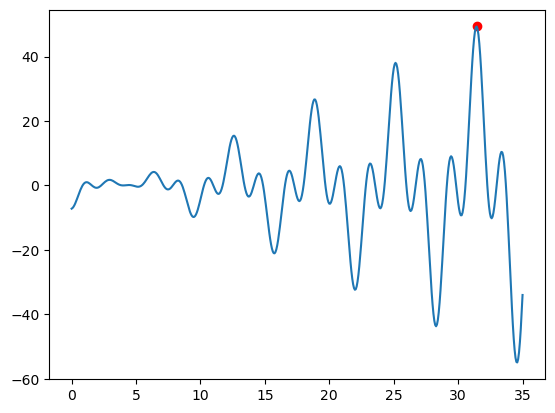

In [10]:
plt.plot(x, y)
plt.scatter(x[INDEX], f(x[INDEX]), c = 'r')
plt.show()